#CSCI 8523 Fall 2022 - Phase I Modeling
#### Maitrayee Deka

---



---



In [1]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

from keras.models import Sequential
from keras.layers import Dense

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
modis_bins_10 = pd.read_csv('/content/drive/Shareddrives/CSCI 8523 F22/Data/modis_bins_10.csv')

In [4]:
modis_bins_10

,year,yield_corn,yield_soybean,yield_wheat,49_0,49_1,49_2,49_3,49_4,49_5,...,257_0,257_1,257_2,257_3,257_4,257_5,257_6,257_7,257_8,257_9
0,2000,8.591008,2.561342,2.823927,633.0,3088.0,35146.0,15609.0,6302.0,2685.0,...,0.0,638.0,4510.0,9483.0,16467.0,14321.0,11139.0,7522.0,415.0,0.0
1,2001,8.673266,2.663958,2.701927,5127.0,1607.0,15211.0,11288.0,2905.0,1133.0,...,0.0,600.0,2743.0,7118.0,10932.0,14067.0,17582.0,11261.0,192.0,0.0
2,2002,8.118010,2.556752,2.356827,6300.0,4784.0,31190.0,13966.0,5728.0,1160.0,...,0.0,383.0,2226.0,5350.0,10579.0,17765.0,20523.0,7276.0,393.0,0.0
3,2003,8.924730,2.276952,2.971268,19212.0,4514.0,17208.0,8173.0,4919.0,1276.0,...,1.0,570.0,3463.0,6709.0,14392.0,16345.0,13524.0,8748.0,743.0,0.0
4,2004,10.063628,2.840494,2.902680,7745.0,2932.0,18556.0,12799.0,3096.0,827.0,...,2.0,259.0,2082.0,5150.0,9925.0,15202.0,19391.0,12056.0,428.0,0.0
5,2005,9.285273,2.896130,2.823190,10436.0,3854.0,25382.0,11585.0,5783.0,1485.0,...,0.0,463.0,2171.0,6119.0,15178.0,19586.0,15017.0,5867.0,94.0,0.0
6,2006,9.357833,2.881782,2.598712,9309.0,3073.0,25941.0,13036.0,5327.0,976.0,...,0.0,328.0,3167.0,5506.0,9367.0,15141.0,18806.0,11862.0,318.0,0.0
7,2007,9.458417,2.806695,2.704637,13683.0,3020.0,14616.0,9375.0,4150.0,932.0,...,0.0,678.0,2907.0,6654.0,14425.0,18751.0,14900.0,6135.0,45.0,0.0
8,2008,9.621053,2.671862,3.014640,14204.0,3145.0,15752.0,7766.0,5036.0,1619.0,...,0.0,597.0,2142.0,3812.0,6630.0,12698.0,20917.0,16693.0,1006.0,0.0
9,2009,10.318039,2.959524,2.980516,9063.0,3817.0,28531.0,9129.0,3172.0,813.0,...,0.0,414.0,1960.0,4302.0,8288.0,12834.0,18776.0,17272.0,649.0,0.0


In [5]:
all_years = list(modis_bins_10['year'].values)

In [6]:
modis_day_cols = list(modis_bins_10.columns)[4:]

In [7]:
len(modis_day_cols)

140

## **ANN - Corn Average MODIS**

In [8]:
predictions_corn = []
for year in all_years:
  print("YEAR ", year )
  test_df = modis_bins_10.loc[modis_bins_10['year'] == year]
  remaining_df = modis_bins_10.loc[(modis_bins_10.year != year)]
  
  # Separate Target Variable and Predictor Variables
  TargetVariable=['yield_corn']
  Predictors = modis_day_cols +  ['year']
  
  y_train = remaining_df[TargetVariable].values
  X_train = remaining_df[Predictors].values

  y_test = test_df[TargetVariable].values
  X_test = test_df[Predictors].values
  
  ### Standardization of data ###
  PredictorScaler_train = StandardScaler()
  TargetVarScaler_train = StandardScaler()

  
  # Storing the fit object for later reference
  PredictorScalerFit_train = PredictorScaler_train.fit(X_train)
  TargetVarScalerFit_train = TargetVarScaler_train.fit(y_train)

  
  # Generating the standardized values of X and y
  X_train = PredictorScalerFit_train.transform(X_train)
  y_train = TargetVarScalerFit_train.transform(y_train)

  X_test = PredictorScalerFit_train.transform(X_test)
  y_test = TargetVarScalerFit_train.transform(y_test)
  
  
  # create ANN model
  model = Sequential()
  
  # Defining the Input layer and FIRST hidden layer, both are same!
  model.add(Dense(units=5, input_dim=141, kernel_initializer='normal', activation='relu'))
  
  # Defining the Second layer of the model
  # after the first layer we don't have to specify input_dim as keras configure it automatically
  model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))
  
  # The output neuron is a single fully connected node 
  # Since we will be predicting a single number
  model.add(Dense(1, kernel_initializer='normal'))
  
  # Compiling the model
  model.compile(loss='mean_squared_error', optimizer='adam')
  
  # Fitting the ANN to the Training set
  model.fit(X_train, y_train ,batch_size = 5, epochs = 500, verbose=0)

  # Generating Predictions on testing data
  Predictions=model.predict(X_test)
  
  # Scaling the predicted Price data back to original price scale
  Predictions=TargetVarScalerFit_train.inverse_transform(Predictions)
  
  predictions_corn.append(Predictions[0][0])

YEAR  2000
1/1 [==============================] - 0s 92ms/step
YEAR  2001
1/1 [==============================] - 0s 65ms/step
YEAR  2002
1/1 [==============================] - 0s 89ms/step
YEAR  2003
1/1 [==============================] - 0s 82ms/step
YEAR  2004


1/1 [==============================] - 0s 68ms/step
YEAR  2005


1/1 [==============================] - 0s 68ms/step
YEAR  2006
1/1 [==============================] - 0s 139ms/step
YEAR  2007
1/1 [==============================] - 0s 60ms/step
YEAR  2008
1/1 [==============================] - 0s 69ms/step
YEAR  2009
1/1 [==============================] - 0s 71ms/step
YEAR  2010
1/1 [==============================] - 0s 58ms/step
YEAR  2011
1/1 [==============================] - 0s 60ms/step
YEAR  2012
1/1 [==============================] - 0s 179ms/step
YEAR  2013
1/1 [==============================] - 0s 100ms/step
YEAR  2014
1/1 [==============================] - 0s 58ms/step
YEAR  2015
1/1 [==============================] - 0s 54ms/step
YEAR  2016
1/1 [==============================] - 0s 77ms/step
YEAR  2017
1/1 [==============================] - 0s 62ms/step
YEAR  2018
1/1 [==============================] - 0s 54ms/step
YEAR  2019
1/1 [==============================] - 0s 57ms/step
YEAR  2020
1/1 [==============================] - 0s 56ms/step


In [9]:
predictions_corn

[8.256309,
 10.063337,
 9.18536,
 8.105271,
 9.5785,
 8.727519,
 8.526383,
 8.314252,
 9.953571,
 10.624091,
 10.2197075,
 10.085004,
 8.359562,
 9.264224,
 10.7915745,
 9.987552,
 10.572413,
 10.868517,
 10.522407,
 9.748281,
 10.851569,
 10.879632,
 10.359265]

In [10]:
bin_10_ndvi_predicted_corn = modis_bins_10.copy()

In [11]:
bin_10_ndvi_predicted_corn = bin_10_ndvi_predicted_corn[['year', 'yield_corn']]

In [12]:
bin_10_ndvi_predicted_corn['yield_corn_predicted'] = predictions_corn

In [13]:
bin_10_ndvi_predicted_corn

,year,yield_corn,yield_corn_predicted
0,2000,8.591008,8.256309
1,2001,8.673266,10.063337
2,2002,8.118010,9.185360
3,2003,8.924730,8.105271
4,2004,10.063628,9.578500
5,2005,9.285273,8.727519
6,2006,9.357833,8.526383
7,2007,9.458417,8.314252
8,2008,9.621053,9.953571
9,2009,10.318039,10.624091


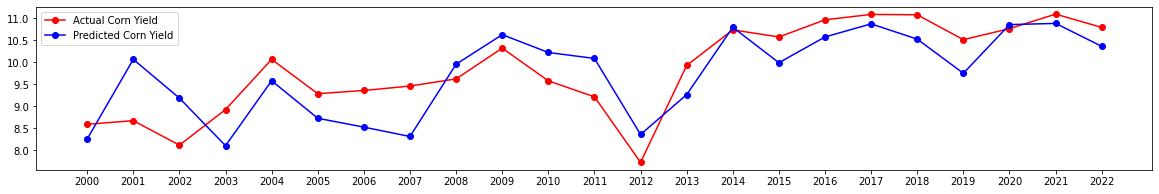

In [14]:
plt.rcParams["figure.figsize"] = (20,3)

plt.plot(bin_10_ndvi_predicted_corn['year'], bin_10_ndvi_predicted_corn['yield_corn'], color='red', marker='o', label='Actual Corn Yield')
plt.plot(bin_10_ndvi_predicted_corn['year'], bin_10_ndvi_predicted_corn['yield_corn_predicted'], color='blue', marker='o', label = 'Predicted Corn Yield')

plt.legend()
plt.xticks(np.arange(min(bin_10_ndvi_predicted_corn['year']), max(bin_10_ndvi_predicted_corn['year'])+1, 1.0))
plt.show()

In [15]:
#calculate RMSE
sqrt(mean_squared_error(bin_10_ndvi_predicted_corn['yield_corn'], bin_10_ndvi_predicted_corn['yield_corn_predicted']))

0.6685883931071528

## **ANN - SB Average MODIS**

In [16]:
predictions_sb = []

for year in all_years:
  print("YEAR ", year )
  test_df = modis_bins_10.loc[modis_bins_10['year'] == year]
  remaining_df = modis_bins_10.loc[(modis_bins_10.year != year)]
  

  # Separate Target Variable and Predictor Variables
  TargetVariable=['yield_soybean']
  Predictors = modis_day_cols + ['year']
  
  y_train = remaining_df[TargetVariable].values
  X_train = remaining_df[Predictors].values

  y_test = test_df[TargetVariable].values
  X_test = test_df[Predictors].values
  
  ### Sandardization of data ###
  PredictorScaler_train = StandardScaler()
  TargetVarScaler_train = StandardScaler()

  
  # Storing the fit object for later reference
  PredictorScalerFit_train = PredictorScaler_train.fit(X_train)
  TargetVarScalerFit_train = TargetVarScaler_train.fit(y_train)
  
  # Generating the standardized values of X and y
  X_train = PredictorScalerFit_train.transform(X_train)
  y_train = TargetVarScalerFit_train.transform(y_train)

  X_test = PredictorScalerFit_train.transform(X_test)
  y_test = TargetVarScalerFit_train.transform(y_test)
  
  # create ANN model
  model = Sequential()
  
  # Defining the Input layer and FIRST hidden layer, both are same!
  model.add(Dense(units=5, input_dim=141, kernel_initializer='normal', activation='relu'))
  
  # Defining the Second layer of the model
  # after the first layer we don't have to specify input_dim as keras configure it automatically
  model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))
  
  # The output neuron is a single fully connected node 
  # Since we will be predicting a single number
  model.add(Dense(1, kernel_initializer='normal'))
  
  # Compiling the model
  model.compile(loss='mean_squared_error', optimizer='adam')
  
  # Fitting the ANN to the Training set
  model.fit(X_train, y_train ,batch_size = 5, epochs = 500, verbose=0)

  # Generating Predictions on testing data
  Predictions=model.predict(X_test)
  
  # Scaling the predicted Price data back to original price scale
  Predictions=TargetVarScalerFit_train.inverse_transform(Predictions)
  
  predictions_sb.append(Predictions[0][0])

YEAR  2000
1/1 [==============================] - 0s 58ms/step
YEAR  2001
1/1 [==============================] - 0s 139ms/step
YEAR  2002
1/1 [==============================] - 0s 145ms/step
YEAR  2003
1/1 [==============================] - 0s 55ms/step
YEAR  2004
1/1 [==============================] - 0s 56ms/step
YEAR  2005
1/1 [==============================] - 0s 65ms/step
YEAR  2006
1/1 [==============================] - 0s 56ms/step
YEAR  2007
1/1 [==============================] - 0s 56ms/step
YEAR  2008
1/1 [==============================] - 0s 58ms/step
YEAR  2009
1/1 [==============================] - 0s 57ms/step
YEAR  2010
1/1 [==============================] - 0s 84ms/step
YEAR  2011
1/1 [==============================] - 0s 58ms/step
YEAR  2012
1/1 [==============================] - 0s 54ms/step
YEAR  2013
1/1 [==============================] - 0s 54ms/step
YEAR  2014
1/1 [==============================] - 0s 59ms/step
YEAR  2015
1/1 [==============================] - 0s 

In [17]:
bin_10_ndvi_predicted_sb = modis_bins_10.copy()
bin_10_ndvi_predicted_sb = bin_10_ndvi_predicted_sb[['year', 'yield_soybean']]
bin_10_ndvi_predicted_sb['yield_soybean_predicted'] = predictions_sb

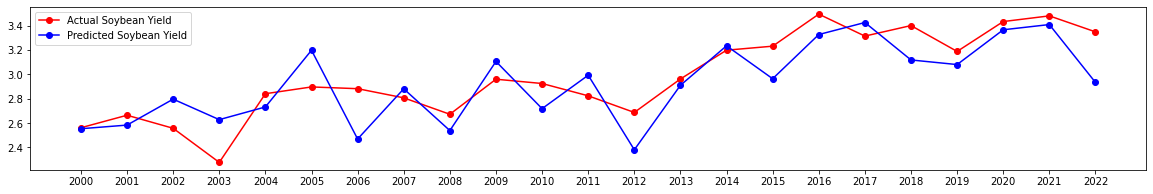

In [18]:
plt.plot(bin_10_ndvi_predicted_sb['year'], bin_10_ndvi_predicted_sb['yield_soybean'], color='red', marker='o', label='Actual Soybean Yield')
plt.plot(bin_10_ndvi_predicted_sb['year'], bin_10_ndvi_predicted_sb['yield_soybean_predicted'], color='blue', marker='o', label = 'Predicted Soybean Yield')

plt.legend()
plt.xticks(np.arange(min(bin_10_ndvi_predicted_sb['year']), max(bin_10_ndvi_predicted_sb['year'])+1, 1.0))
plt.show()

In [19]:
#calculate RMSE
sqrt(mean_squared_error(bin_10_ndvi_predicted_sb['yield_soybean'], bin_10_ndvi_predicted_sb['yield_soybean_predicted']))

0.21453219830648973

## **ANN - Wheat Average MODIS**

In [20]:
predictions_wheat = []

for year in all_years:
  print("YEAR ", year )
  test_df = modis_bins_10.loc[modis_bins_10['year'] == year]
  remaining_df = modis_bins_10.loc[(modis_bins_10.year != year)]

  # Separate Target Variable and Predictor Variables
  TargetVariable=['yield_wheat']
  Predictors = modis_day_cols + ['year']
  
  y_train = remaining_df[TargetVariable].values
  X_train = remaining_df[Predictors].values

  y_test = test_df[TargetVariable].values
  X_test = test_df[Predictors].values
  
  ### Sandardization of data ###
  PredictorScaler_train = StandardScaler()
  TargetVarScaler_train = StandardScaler()
  
  # Storing the fit object for later reference
  PredictorScalerFit_train = PredictorScaler_train.fit(X_train)
  TargetVarScalerFit_train = TargetVarScaler_train.fit(y_train)

  # Generating the standardized values of X and y
  X_train = PredictorScalerFit_train.transform(X_train)
  y_train = TargetVarScalerFit_train.transform(y_train)

  X_test = PredictorScalerFit_train.transform(X_test)
  y_test = TargetVarScalerFit_train.transform(y_test)
  
  # create ANN model
  model = Sequential()
  
  # Defining the Input layer and FIRST hidden layer, both are same!
  model.add(Dense(units=5, input_dim=141, kernel_initializer='normal', activation='relu'))
  
  # Defining the Second layer of the model
  # after the first layer we don't have to specify input_dim as keras configure it automatically
  model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))
  
  # The output neuron is a single fully connected node 
  # Since we will be predicting a single number
  model.add(Dense(1, kernel_initializer='normal'))
  
  # Compiling the model
  model.compile(loss='mean_squared_error', optimizer='adam')
  
  # Fitting the ANN to the Training set
  model.fit(X_train, y_train ,batch_size = 5, epochs = 500, verbose=0)

  # Generating Predictions on testing data
  Predictions=model.predict(X_test)
  
  # Scaling the predicted Price data back to original price scale
  Predictions=TargetVarScalerFit_train.inverse_transform(Predictions)
  
  predictions_wheat.append(Predictions[0][0])

YEAR  2000
1/1 [==============================] - 1s 519ms/step
YEAR  2001
1/1 [==============================] - 0s 63ms/step
YEAR  2002
1/1 [==============================] - 0s 70ms/step
YEAR  2003
1/1 [==============================] - 0s 56ms/step
YEAR  2004
1/1 [==============================] - 0s 56ms/step
YEAR  2005
1/1 [==============================] - 0s 55ms/step
YEAR  2006
1/1 [==============================] - 0s 53ms/step
YEAR  2007
1/1 [==============================] - 0s 64ms/step
YEAR  2008
1/1 [==============================] - 0s 62ms/step
YEAR  2009
1/1 [==============================] - 0s 60ms/step
YEAR  2010
1/1 [==============================] - 0s 68ms/step
YEAR  2011
1/1 [==============================] - 0s 59ms/step
YEAR  2012
1/1 [==============================] - 0s 58ms/step
YEAR  2013
1/1 [==============================] - 0s 56ms/step
YEAR  2014
1/1 [==============================] - 0s 56ms/step
YEAR  2015
1/1 [==============================] - 0s 5

In [21]:
bin_10_ndvi_predicted_wheat = modis_bins_10.copy()
bin_10_ndvi_predicted_wheat = bin_10_ndvi_predicted_wheat[['year', 'yield_wheat']]
bin_10_ndvi_predicted_wheat['yield_wheat_predicted'] = predictions_wheat

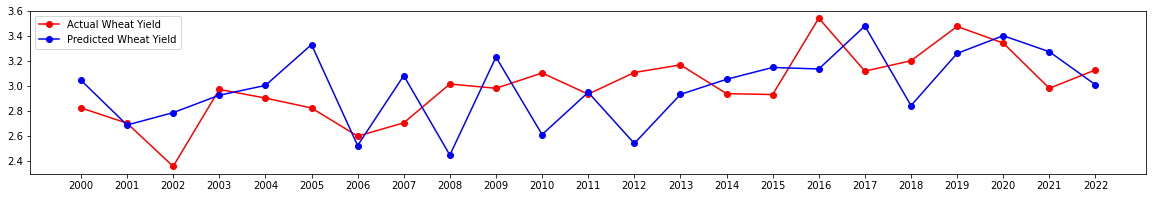

In [22]:
plt.plot(bin_10_ndvi_predicted_wheat['year'], bin_10_ndvi_predicted_wheat['yield_wheat'], color='red', marker='o', label='Actual Wheat Yield')
plt.plot(bin_10_ndvi_predicted_wheat['year'], bin_10_ndvi_predicted_wheat['yield_wheat_predicted'], color='blue', marker='o', label = 'Predicted Wheat Yield')

plt.legend()
plt.xticks(np.arange(min(bin_10_ndvi_predicted_wheat['year']), max(bin_10_ndvi_predicted_wheat['year'])+1, 1.0))
plt.show()

In [23]:
#calculate RMSE
sqrt(mean_squared_error(bin_10_ndvi_predicted_wheat['yield_wheat'], bin_10_ndvi_predicted_wheat['yield_wheat_predicted']))

0.3151706072235174